In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def print_results(df, sample_type, model_name=None):
    if model_name is not None:
        row = (df['Sample Type'] == sample_type) & (df['Model Name'] == model_name)
    else:
        row = df['Sample Type'] == sample_type
    
    mu = df[row]['ACC-true'].mean()
    sigma = df[row]['ACC-true'].std()
    best = df[row]['ACC-true'].max()
    print(f'ACC: {mu:.3f} +- {sigma:.3f}, Best: {best:.3f}')
    # print(f'${mu:.3f}\pm{sigma:.3f}$')

    mu = df[row]['AUC-true'].mean()
    sigma = df[row]['AUC-true'].std()
    best = df[row]['AUC-true'].max()
    print(f'AUC: {mu:.3f} +- {sigma:.3f}, Best: {best:.3f}')
    # print(f'${mu:.3f}\pm{sigma:.3f}$')

# Load file

In [34]:
file_name = './CWoLa_Hunting_Hidden_Valley_training_results.csv'
df = pd.read_csv(file_name)

# Various signal sample size

In [37]:
ACC, std = [], []

sensitivities = [1,5,10]

for id, sensitivity in enumerate(sensitivities):
    sample_type = f'Sensitivity: {sensitivity:.1f}'
    model_name = f'SB_{sensitivity:.1f}'
    row = (df['Sample Type'] == sample_type) & (df['Model Name'] == model_name)
    

    ACC.append(df[row]['ACC-true'].mean())
    std.append(df[row]['ACC-true'].std())

# row = (df['Sample Type'] == '1000 GeV: No signal, no Higgs pT, m') & (df['Model Name'] == 'deep_wo_sig_no_higgs_pt_m_1000GeV')
# no_sig_acc = df[row]['ACC-true'].mean()
# no_sig_std = df[row]['ACC-true'].std()

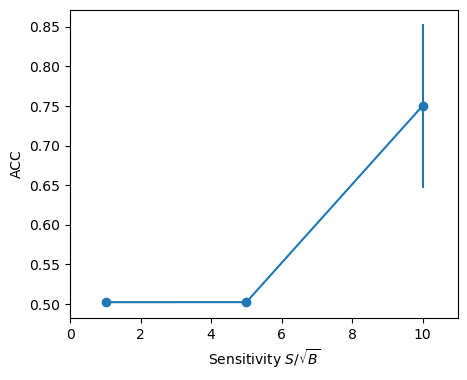

In [38]:
fig, ax = plt.subplots(1,1,figsize=(5, 4))
# plot no signal sample ACC with error bar
# ax.axhline(y=no_sig_acc, color='k', linestyle='--', label='No signal sample')
# ax.axhspan(no_sig_acc - no_sig_std, no_sig_acc + no_sig_std, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.errorbar(sensitivities, ACC, yerr=std, marker='o', label='')
ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(0, 11)

handles, labels = ax.get_legend_handles_labels()
# handles = [(handles[0],handles[1]), handles[2] ]
# labels = ['No signal', labels[2]]
# ax.legend(handles, labels, frameon=False, loc='upper left')

# plt.savefig('../figures/HVmodel_CWoLa_CNN.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

In [39]:
sensitivities = [1,5,10]
ACC = [[]] * len(sensitivities)

for id, sensitivity in enumerate(sensitivities):
    sample_type = f'Sensitivity: {sensitivity:.1f}'
    model_name = f'SB_{sensitivity:.1f}'
    row = (df['Sample Type'] == sample_type) & (df['Model Name'] == model_name)
    
    ACC[id] = df[row]['ACC-true']

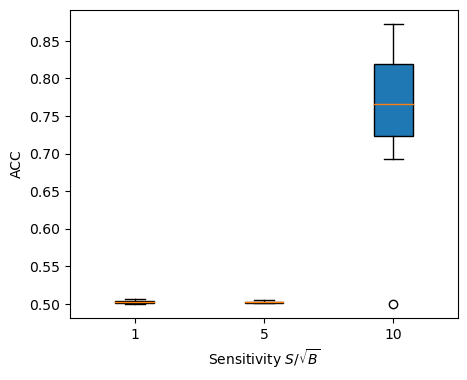

In [44]:
fig, ax = plt.subplots(1,1,figsize=(5, 4))


# 画盒状图
ax.boxplot(ACC, vert=True, patch_artist=True)

# 添加标签和标题
ax.set_xticks([1, 2, 3], sensitivities)
ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')
# 显示图形
plt.show()